In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualization
import seaborn as sns
from warnings import filterwarnings 
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import plot_importance
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from imblearn.ensemble import RUSBoostClassifier, BalancedRandomForestClassifier, BalancedBaggingClassifier, EasyEnsembleClassifier
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.metrics import plot_roc_curve, roc_auc_score, plot_confusion_matrix,plot_precision_recall_curve

In [365]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

In [261]:
sns.set('notebook')
plt.style.use('fivethirtyeight')
filterwarnings('ignore')

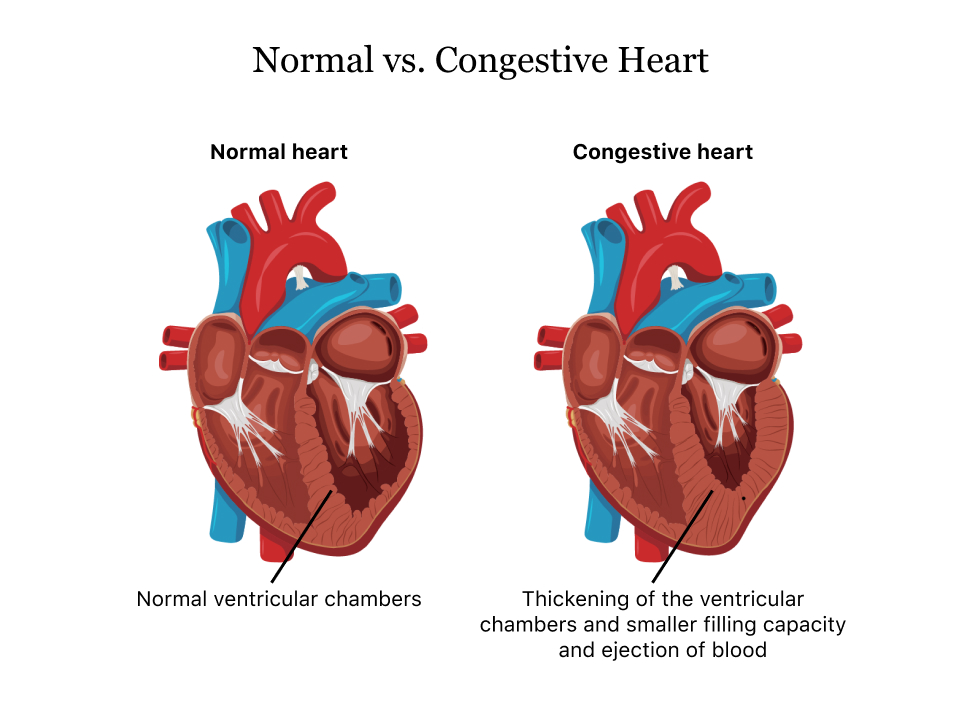

In [262]:
from IPython.display import Image
Image(filename='Normal-vs.-Congestive-Heart.jpg')

In [263]:
heart = pd.read_csv('heart.csv')

In [264]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Data Preprocessing and Exploratory Data Analysis, Visualization

In [265]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [266]:
heart.describe(include = 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


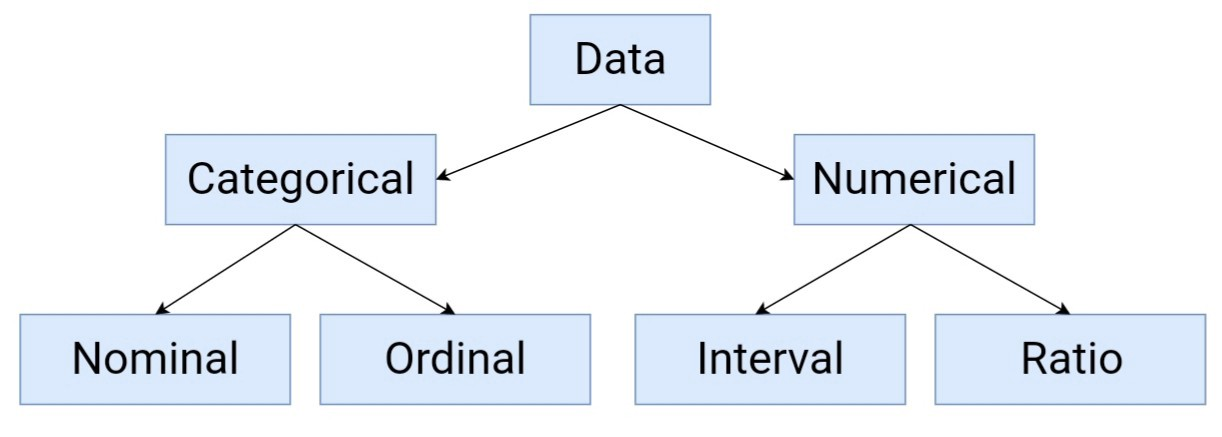

In [267]:
from IPython.display import Image
Image(filename='0_bP10c9SgSurJpkQX.jpeg')

1. For HeartDisease, we observe than 25% of datapoint are Normal against 50% and 75% of datapoint are heart disease. our datasets are unbalanced.
2. Age and RestingBP feature seems to be normal distribution.
3. Many datapoint have no fasting blood sugar.

In [268]:
EDA = heart.copy()
EDA.shape

(918, 12)

In [269]:
# display the type of our features 
EDA.dtypes.value_counts()

int64      6
object     5
float64    1
dtype: int64

we have 5 cat features we need to handl it in features engineering step

In [270]:
EDA.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [271]:
EDA.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

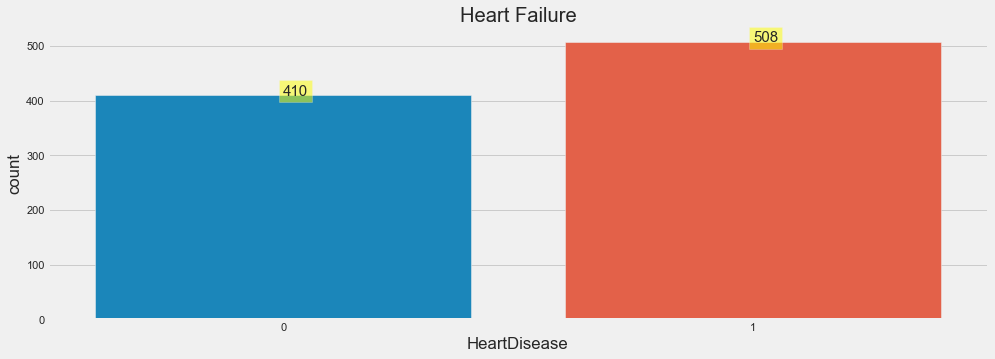

In [272]:
plt.figure(figsize=(15,5)) # setting the height and weight
g = sns.countplot(x='HeartDisease', data=heart)
for i, u in enumerate(heart['HeartDisease'].value_counts(ascending=True)):
    g.text(i, u, str(u), fontsize=15, bbox=dict(facecolor='yellow', alpha=0.5))
plt.title('Heart Failure')
plt.show()

okay we can say the distribution of thelabel is not asymmetric so we can use accrrarcy as evaluation metric



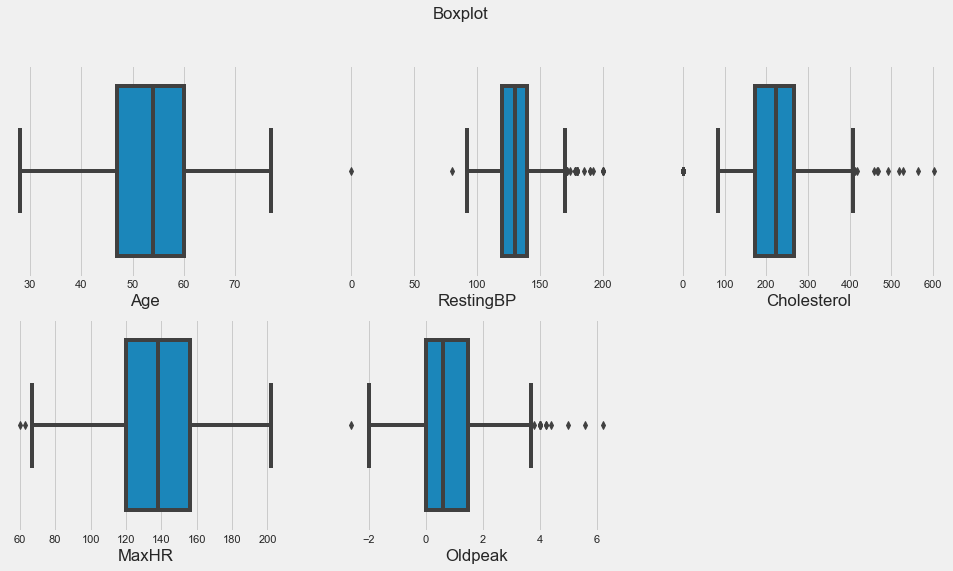

In [273]:
_, ax = plt.subplots(2, 3, figsize=(15,8)) # Outliers
plt.suptitle('Boxplot')
for i, u in enumerate(['Age','RestingBP','Cholesterol', 'MaxHR', 'Oldpeak']):
    sns.boxplot(x=u, data=heart, ax=ax[0 if i <3 else 1, i if i < 3 else i%3])
ax[1,2].set_visible(False)
plt.show()

Numerical feature

In [274]:
num_col = ["Age",
           "RestingBP",
           "Cholesterol",
           "FastingBS",
           "MaxHR",
           "Oldpeak",
           "HeartDisease"]

In [275]:
def describe(num_col):
    return pd.concat([EDA[num_col].describe().T,
                      EDA[num_col].skew().rename('skew'),
                      EDA[num_col].median().rename('Median'),
                      EDA[num_col].kurtosis().rename('kurtosis')], axis=1).T
describe(num_col)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000
skew,-0.195933,0.179839,-0.610086,1.264484,-0.144359,1.022872,-0.215086
Median,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000


Use a histogram when: The data are numerical. You want to see the shape of the data's distribution.

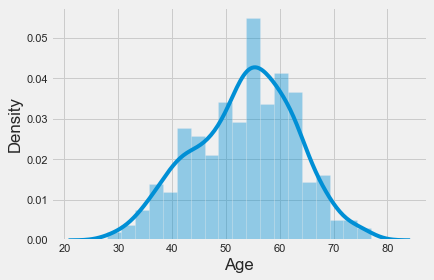

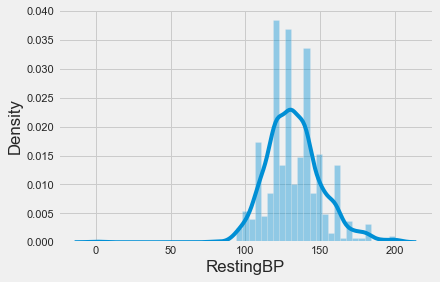

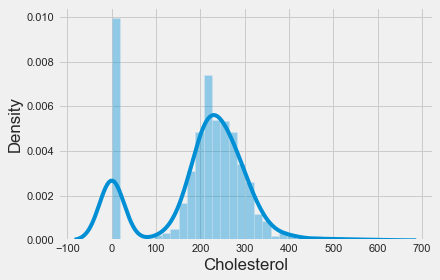

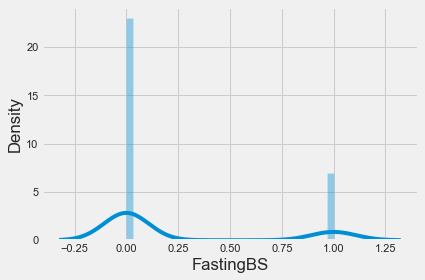

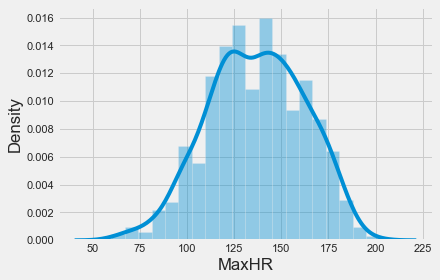

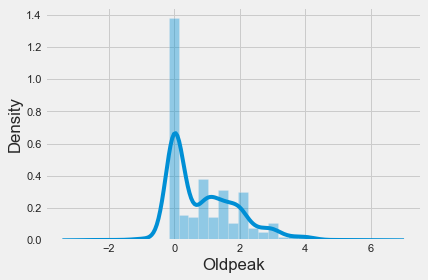

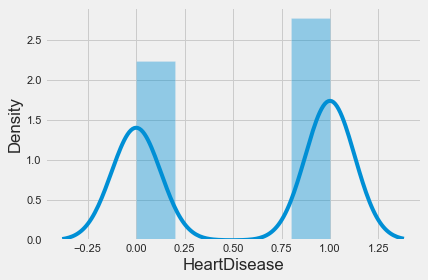

In [276]:
# Display histogram for all numericals features
for col in EDA[num_col]:
    plt.figure()
    sns.distplot(EDA[col])
    plt.show()

In [277]:
heartDisease = EDA['HeartDisease']
# goodbye target column
df = EDA.drop(['HeartDisease'],axis=1)

In [278]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>],
       [<AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'FastingBS'}>],
       [<AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>]], dtype=object)

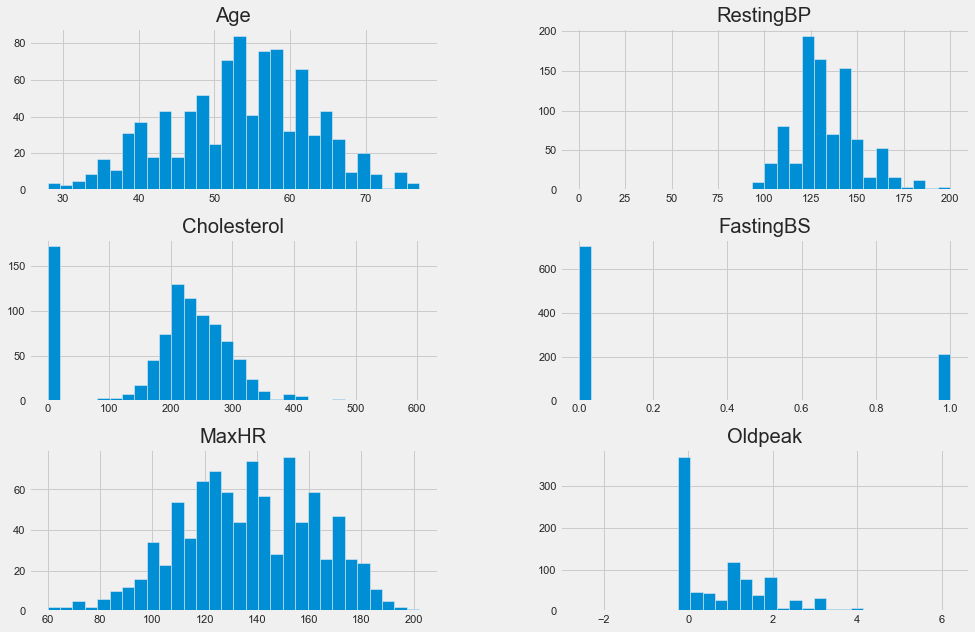

In [279]:
df.hist(bins=30, figsize=(15, 10))

In [280]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000


<AxesSubplot:>

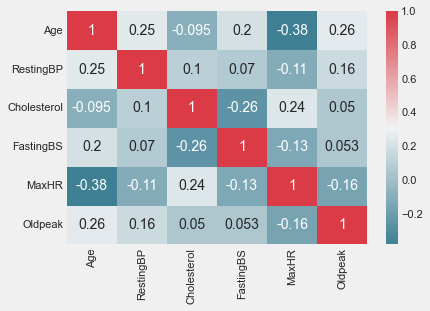

In [281]:
corr = df.corr() # Correlation
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)

categorical features

In [282]:
# define the cat features 
cat_feature = EDA.drop(EDA[num_col],axis=1)
for col in cat_feature:
    print(f'{cat_feature[col].value_counts()} \n')

M    725
F    193
Name: Sex, dtype: int64 

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64 

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64 

N    547
Y    371
Name: ExerciseAngina, dtype: int64 

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64 



In [283]:
cat_feature.value_counts()

Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope
M    ASY            Normal      Y               Flat        109
     ATA            Normal      N               Up           64
     ASY            Normal      N               Flat         55
                    ST          Y               Flat         49
     NAP            Normal      N               Up           46
                                                           ... 
F    NAP            ST          Y               Flat          1
     TA             LVH         N               Up            1
                    Normal      N               Down          1
M    ATA            LVH         Y               Flat          1
     TA             ST          Y               Flat          1
Length: 95, dtype: int64

In [284]:
crosstab = EDA.pivot_table(index='RestingECG', columns='Sex', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

            Age           ChestPainType           Cholesterol            \
Sex           F    M  All             F    M  All           F    M  All   
RestingECG                                                                
LVH          47  141  188            47  141  188          47  141  188   
Normal      118  434  552           118  434  552         118  434  552   
ST           28  150  178            28  150  178          28  150  178   
All         193  725  918           193  725  918         193  725  918   

           ExerciseAngina  ... MaxHR Oldpeak           RestingBP            \
Sex                     F  ...   All       F    M  All         F    M  All   
RestingECG                 ...                                               
LVH                    47  ...   188      47  141  188        47  141  188   
Normal                118  ...   552     118  434  552       118  434  552   
ST                     28  ...   178      28  150  178        28  150  178   
All   

In [285]:
EDA.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


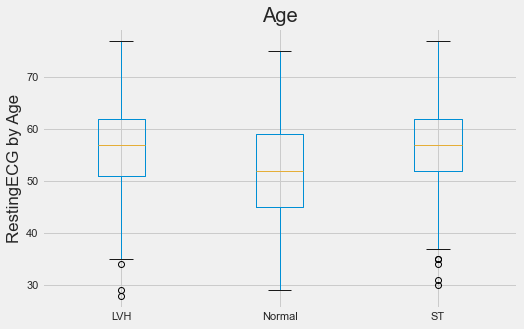

In [286]:
ax = EDA.boxplot(by='RestingECG', column='Age',
                           figsize=(7.5, 5))
ax.set_xlabel('')
ax.set_ylabel('RestingECG by Age')
plt.suptitle('')

plt.tight_layout()
plt.show()

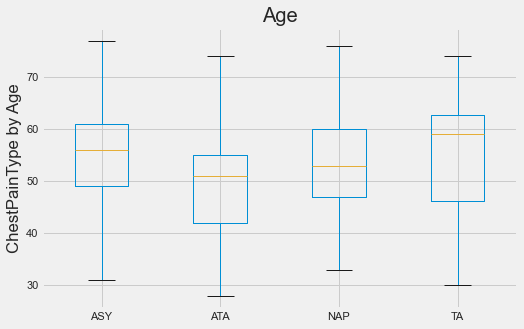

In [287]:
ax = EDA.boxplot(by='ChestPainType', column='Age',
                           figsize=(7.5, 5))
ax.set_xlabel('')
ax.set_ylabel('ChestPainType by Age')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [288]:
EDA.isna().sum() # Check is there any null values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [289]:
heart.skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

In [290]:
heart.kurtosis()

Age            -0.386140
RestingBP       3.271251
Cholesterol     0.118208
FastingBS      -0.401960
MaxHR          -0.448248
Oldpeak         1.203064
HeartDisease   -1.958008
dtype: float64

In [291]:
heart.mode() # Frequency 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


We see the mode of each feature. We say:

Age majority = 54
Sex majority = Male
ChestPainType majority = Asymptomatic

This chart shows that dataset are unbalanced with ratio 4:5.

Only Age feature have intlier.

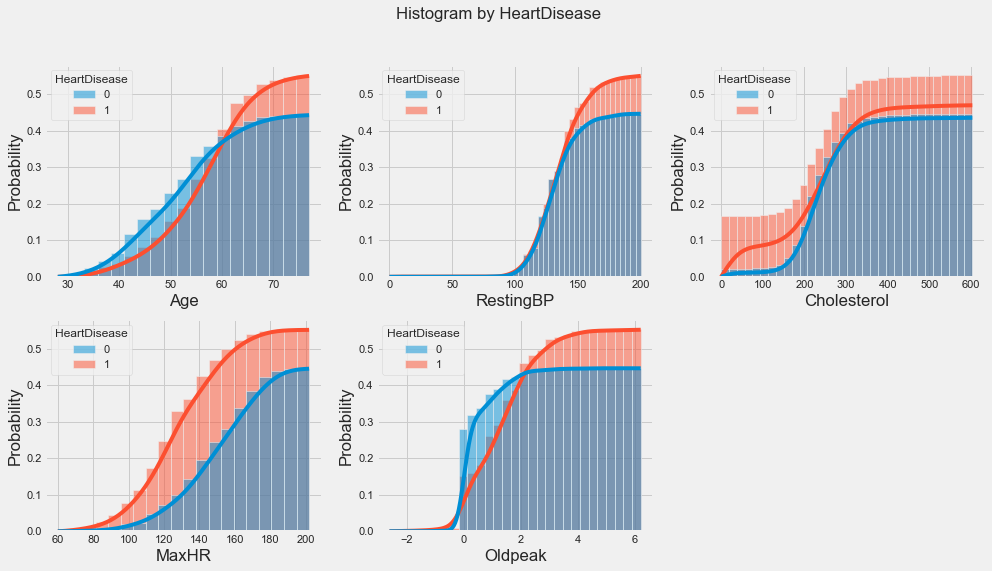

In [292]:
_, ax1 = plt.subplots(2, 3, figsize=(15,8))
plt.suptitle('Histogram by HeartDisease')
for i, u in enumerate(['Age','RestingBP','Cholesterol', 'MaxHR', 'Oldpeak']):
    sns.histplot(x=u, hue='HeartDisease', data=heart, kde=True, ax=ax1[0 if i <3 else 1, i if i < 3 else i%3],
                stat="probability", cumulative=True)
ax1[1,2].set_visible(False)
plt.show()

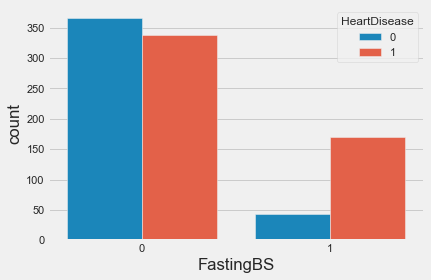

In [293]:
sns.countplot(x='FastingBS', hue='HeartDisease', data=heart)
plt.show()

# Which of independant features are importance in heart disease?

In [294]:
ob_need_cols = [u for u in heart.columns if heart[u].dtype == 'object']
num_need_cols = [u for u in heart.columns if heart[u].dtype != 'object' and u not in ['HeartDisease']]

In [295]:
def studyplot(df=None, label=None):
    fig = plt.figure(figsize=(15,10))
    fig.subplots_adjust(wspace=0.2, hspace=0.4)
    plt.suptitle(f'{label} heart disease.')
    for i, u in enumerate(ob_need_cols):
        ax = fig.add_subplot(2, 3, i+1)
        data = df[u].value_counts()
        g = data.plot.bar(legend=True)
        for i, ux in enumerate(data):
            g.text(i, ux, str(round(100*ux/sum(data)))+'%', ha='center')
        ax.set_title(u)
    plt.show()

In [296]:
study_data = heart.copy()

In [297]:
encoder = LabelEncoder()

In [298]:
study_data[ob_need_cols] = study_data[ob_need_cols].apply(encoder.fit_transform) # later

In [299]:
yt = study_data.pop('HeartDisease')

In [300]:
mutual = pd.Series(mutual_info_classif(study_data, yt, random_state=0),
                   index=study_data.columns, name='mutual_info')

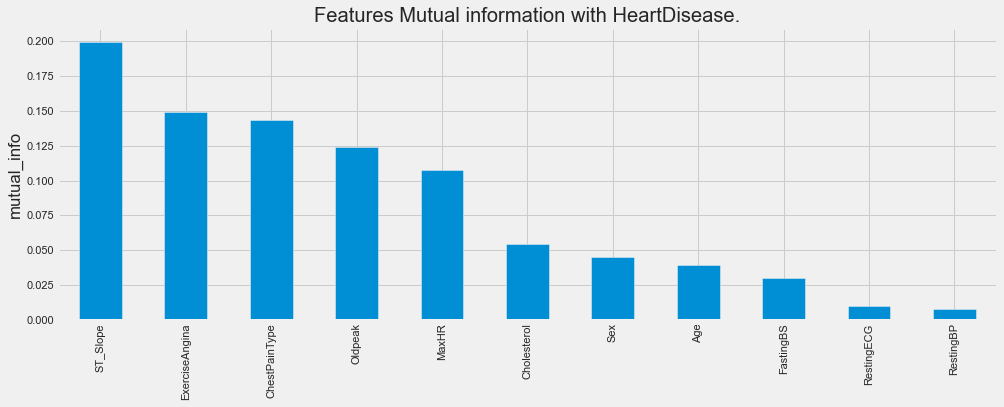

In [301]:
mutual.sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.title('Features Mutual information with HeartDisease.')
plt.ylabel('mutual_info')
plt.show()

The 5 important features in heart disease for mutual_info are ST_Slope, ExerciseAngina, ChestPainType, Oldpeak, MaxHR

Now, we know the five importance feature. We are going to do partial dependence plot (pdp). 4 of the importance feature are categorical type (sex, chestpaintype, exerciseangina and st_slope), the last is a float type.

Text(0, 0.5, 'Count')

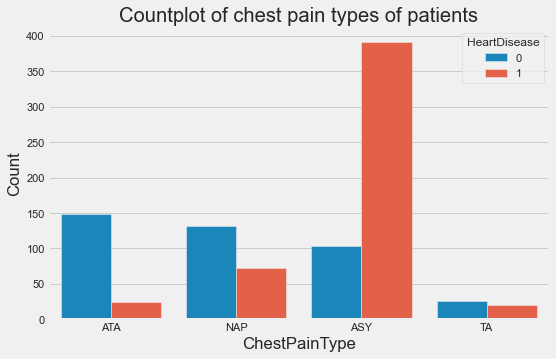

In [302]:
# Set width and height of figure
plt.figure(figsize=(8,5))

# Hue can be used to show relationship with another categorical variable
sns.countplot(x='ChestPainType', data=heart, hue='HeartDisease')

# Aesthetics
plt.title('Countplot of chest pain types of patients')
plt.ylabel('Count')

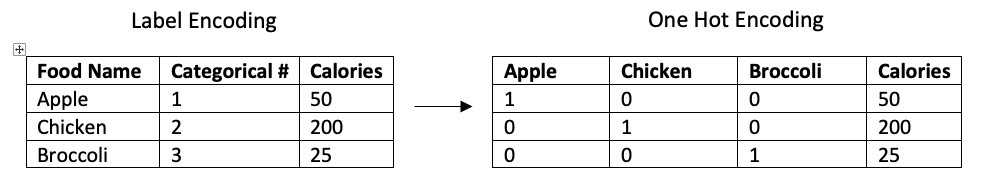

In [303]:
from IPython.display import Image
Image(filename='label encoding.png')

# Day 2

# Feature Engineering

In [304]:
EDA.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Encoding

Sex and ExerciseAngina both are two classes, we can encode by 0 and 1

In [305]:
EDA.Sex = EDA.Sex.replace({'M':0,'F':1})
EDA.ExerciseAngina = EDA.ExerciseAngina.replace({'N':0,'Y':1}) # label Encoding

In [306]:
EDA

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,0,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,0,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,1,ATA,130,236,0,LVH,174,0,0.0,Flat,1


In [307]:
'''Very high blood pressure levels (hypertension (Stage 2) and hypertensive crisis)
as defined by the American Heart Association.'''

def blood_pressure_levels(row):
    if row['RestingBP'] >= 140:
        return 'VERY_HIGH'
    else:
        return 'UNCATEGORIZED'


In [308]:
def age_sex(row, Age_threshold=45):
    if row['Age'] > Age_threshold and row['Sex'] == 'M':
        return 'Older_Man'
    elif row['Age'] <= Age_threshold and row ['Sex'] == 'M':
        return 'Younger_Man'
    elif row['Age'] > Age_threshold and row ['Sex'] == 'F':
        return 'Older_Woman'
    elif row['Age'] <= Age_threshold and row ['Sex'] == 'F':
        return 'Younger_Woman'
    else:
        return 0


In [309]:
'''Total cholesterol levels less than 200 milligrams per deciliter (mg/dL) are considered desirable for adults. 
A reading between 200 and 239 mg/dL is considered borderline high and a reading of 240 mg/dL and above is considered high.'''

def cholesterol(row):
    if row['Cholesterol'] >= 200 and row['Cholesterol'] <= 239:
        return 'Borderline_High'
    elif row['Cholesterol'] > 239:
        return 'High'
    else:
        return 'Normal'


In [310]:
#New Features preparation   
EDA['Age_Sex_Cats'] = EDA.apply(lambda row: age_sex(row), axis=1)
EDA['Cholesterol_Cats'] = EDA.apply(lambda row: cholesterol(row), axis=1)
EDA['Systolic_Blood_Pressure'] = EDA.apply(lambda row: blood_pressure_levels(row), axis=1)

In [311]:
EDA

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_Sex_Cats,Cholesterol_Cats,Systolic_Blood_Pressure
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0,0,High,VERY_HIGH
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1,0,Normal,VERY_HIGH
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0,0,High,UNCATEGORIZED
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat,1,0,Borderline_High,UNCATEGORIZED
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up,0,0,Normal,VERY_HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,0,1.2,Flat,1,0,High,UNCATEGORIZED
914,68,0,ASY,144,193,1,Normal,141,0,3.4,Flat,1,0,Normal,VERY_HIGH
915,57,0,ASY,130,131,0,Normal,115,1,1.2,Flat,1,0,Normal,UNCATEGORIZED
916,57,1,ATA,130,236,0,LVH,174,0,0.0,Flat,1,0,Borderline_High,UNCATEGORIZED


RestingECG, ST_Slope and ChestPainType need One Hot Encoding

In [313]:
EDA.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

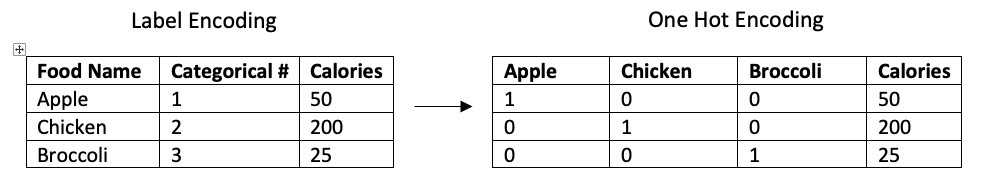

In [136]:
from IPython.display import Image
Image(filename='label encoding.png')

In [314]:
# Encoding categorical features
encoded_EDA = pd.get_dummies(EDA, drop_first=True)
encoded_EDA

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Age_Sex_Cats,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,Cholesterol_Cats_High,Cholesterol_Cats_Normal,Systolic_Blood_Pressure_VERY_HIGH
0,40,0,140,289,0,172,0,0.0,0,0,1,0,0,1,0,0,1,1,0,1
1,49,1,160,180,0,156,0,1.0,1,0,0,1,0,1,0,1,0,0,1,1
2,37,0,130,283,0,98,0,0.0,0,0,1,0,0,0,1,0,1,1,0,0
3,48,1,138,214,0,108,1,1.5,1,0,0,0,0,1,0,1,0,0,0,0
4,54,0,150,195,0,122,0,0.0,0,0,0,1,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,132,0,1.2,1,0,0,0,1,1,0,1,0,1,0,0
914,68,0,144,193,1,141,0,3.4,1,0,0,0,0,1,0,1,0,0,1,1
915,57,0,130,131,0,115,1,1.2,1,0,0,0,0,1,0,1,0,0,1,0
916,57,1,130,236,0,174,0,0.0,1,0,1,0,0,0,0,1,0,0,0,0


In [315]:
X_EDA = encoded_EDA.drop('HeartDisease', axis = 1) # independent variables
y_EDA = encoded_EDA['HeartDisease'] # Dependent( target)

In [318]:
X_EDA

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Age_Sex_Cats,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,Cholesterol_Cats_High,Cholesterol_Cats_Normal,Systolic_Blood_Pressure_VERY_HIGH
0,40,0,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1,1,0,1
1,49,1,160,180,0,156,0,1.0,0,0,1,0,1,0,1,0,0,1,1
2,37,0,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1,1,0,0
3,48,1,138,214,0,108,1,1.5,0,0,0,0,1,0,1,0,0,0,0
4,54,0,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,132,0,1.2,0,0,0,1,1,0,1,0,1,0,0
914,68,0,144,193,1,141,0,3.4,0,0,0,0,1,0,1,0,0,1,1
915,57,0,130,131,0,115,1,1.2,0,0,0,0,1,0,1,0,0,1,0
916,57,1,130,236,0,174,0,0.0,0,1,0,0,0,0,1,0,0,0,0


Scaling: The data is transformed such that the data is within a specific range of values. This is required for KNN and Support Vector models.


Normalization: The data is transformed such that the distribution of the dataset can be described as normal. Any model that assumes a normal distribution will require normalization of the dataset. A classic example of a model that requires normalization is an OLS regression.


Standardization: The data is transformed such that the distribution of the dataset has a mean of 0 and a standard deviation of 1 (ie can be described by a standard normal distribution). Many machine learning models require standardization. Examples include SVMs, neural networks, and logistic regressions.

In [319]:
X_categorical = EDA.select_dtypes(exclude='number')

In [320]:
X_categorical.head()

,ChestPainType,RestingECG,ST_Slope,Cholesterol_Cats,Systolic_Blood_Pressure
0,ATA,Normal,Up,High,VERY_HIGH
1,NAP,Normal,Flat,Normal,VERY_HIGH
2,ATA,ST,Up,High,UNCATEGORIZED
3,ASY,Normal,Flat,Borderline_High,UNCATEGORIZED
4,NAP,Normal,Up,Normal,VERY_HIGH


In [321]:
X_numerical = df.select_dtypes(include='number')

In [322]:
X_numerical

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0
...,...,...,...,...,...,...
913,45,110,264,0,132,1.2
914,68,144,193,1,141,3.4
915,57,130,131,0,115,1.2
916,57,130,236,0,174,0.0


In [323]:
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer, MinMaxScaler, MaxAbsScaler
ss = StandardScaler()
norm = Normalizer()
rs = RobustScaler()
minmax = MinMaxScaler()
maxabs = MaxAbsScaler()

In [324]:
EDA.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_Sex_Cats,Cholesterol_Cats,Systolic_Blood_Pressure
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0,0,High,VERY_HIGH
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1,0,Normal,VERY_HIGH
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0,0,High,UNCATEGORIZED
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat,1,0,Borderline_High,UNCATEGORIZED
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up,0,0,Normal,VERY_HIGH


From those basic exploration we can conclude that:

This dataset doesn't contain nan values
The continuous features (age, chol, ...) aren't in the same range
There is no clear linear relationship between categorical features
There are some outliers when visualizing the pairwise relationship with the categorical features

In [325]:
# Binning continuous features ( Grouping )
# age
data_f = EDA
data_f['Age'] = pd.cut(data_f['Age'], bins=5, labels=range(5))
# trtbps
data_f['RestingBP'] = pd.cut(data_f['RestingBP'], bins=5, labels=range(5))
# chol
data_f['Cholesterol'] = pd.cut(data_f['Cholesterol'], bins=5, labels=range(5))
# thalachh
data_f['MaxHR'] = pd.cut(data_f['MaxHR'], bins=5, labels=range(5))

# Standardization

This is the most basic transformation method.

It is a method that makes the mean 0 and the standard deviation 1 through a linear transformation!

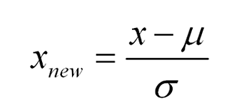

In [107]:
from IPython.display import Image
Image(filename='standard.png')

In [326]:
from sklearn.preprocessing import StandardScaler

In [329]:
X = EDA.drop('HeartDisease', axis=1)
y = EDA['HeartDisease']

train_x, test_x, train_y, test_y = train_test_split(X_EDA, y_EDA, test_size=0.2, shuffle=True, random_state=0)
# test size = 0.2, ratio of the data is 80% and 20%

In [330]:
train_x.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Age_Sex_Cats,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,Cholesterol_Cats_High,Cholesterol_Cats_Normal,Systolic_Blood_Pressure_VERY_HIGH
378,70,0,140,0,1,157,1,2.0,0,0,0,0,1,0,1,0,0,1,1
356,46,0,115,0,0,113,1,1.5,0,0,0,0,1,0,1,0,0,1,0
738,65,1,160,360,0,151,0,0.8,0,0,1,0,0,0,0,1,1,0,1
85,66,0,140,139,0,94,1,1.0,0,0,0,0,1,0,1,0,0,1,1
427,59,0,140,0,0,117,1,1.0,0,0,0,0,0,1,1,0,0,1,1


In [228]:
# Store the numeric variable to be converted into a list
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS',
            'MaxHR', 'Oldpeak']
scaler = StandardScaler()
scaler.fit(train_x[num_cols])

StandardScaler()

# Min-Max Scaling

Feature scaling is essential for machine learning algorithms that calculate distances between data.

This is a Min-Max Scaling method that converts the range taken by the variable value into a specific interval (between 0 and 1).

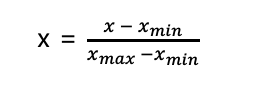

In [111]:
from IPython.display import Image
Image(filename='min.png')

In [331]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_x[num_cols])

MinMaxScaler()

In [332]:
train_x[num_cols] = scaler.transform(train_x[num_cols])
test_x[num_cols] = scaler.transform(test_x[num_cols])

In [231]:
X_EDA.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['min'], cmap='Reds')\
                            .background_gradient(subset=['max'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
Sex,918.000000,0.210240,0.407701,0.000000,0.000000,0.000000,0.000000,1.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
ExerciseAngina,918.000000,0.404139,0.490992,0.000000,0.000000,0.000000,1.000000,1.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
Age_Sex_Cats,918.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ChestPainType_ATA,918.000000,0.188453,0.391287,0.000000,0.000000,0.000000,0.000000,1.000000


In [333]:
train_x.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['min'], cmap='Reds')\
                            .background_gradient(subset=['max'], cmap='coolwarm')

## The minimum value is 0 and the maximum value is 1.

,count,mean,std,min,25%,50%,75%,max
Age,734.000000,0.523133,0.190607,0.000000,0.392857,0.530612,0.653061,1.000000
Sex,734.000000,0.211172,0.408418,0.000000,0.000000,0.000000,0.000000,1.000000
RestingBP,734.000000,0.662718,0.092348,0.000000,0.600000,0.650000,0.700000,1.000000
Cholesterol,734.000000,0.329804,0.178388,0.000000,0.290630,0.368159,0.439469,1.000000
FastingBS,734.000000,0.217984,0.413158,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,734.000000,0.530090,0.184417,0.000000,0.410072,0.539568,0.669065,1.000000
ExerciseAngina,734.000000,0.410082,0.492184,0.000000,0.000000,0.000000,1.000000,1.000000
Oldpeak,734.000000,0.397154,0.119065,0.000000,0.295455,0.363636,0.465909,1.000000
Age_Sex_Cats,734.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ChestPainType_ATA,734.000000,0.197548,0.398420,0.000000,0.000000,0.000000,0.000000,1.000000


Min-max normalization is one of the most common ways to normalize data. ... Min-max normalization has one fairly significant downside: it does not handle outliers very well. For example, if you have 99 values between 0 and 40, and one value is 100, then the 99 values will all be transformed to a value between 0 and 0.4.

# Why should we use Feature Engineering in data science?


In Data Science, the performance of the model is depending on data preprocessing and data handling. Suppose if we build a model without Handling data, we got an accuracy of around 70%. By applying the Feature engineering on the same model there is a chance to increase the performance from 70% to more.

Simply, by using Feature Engineering we improve the performance of the model.

# ExtraTreesClassifier method

ExtraTreesClassifier method will help to give the importance of each independent feature with a dependent feature. Feature importance will give you a score for each feature of your data, the higher the score more important or relevant to the feature towards your output variable.

In [334]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_EDA,y_EDA)
print(model.feature_importances_)

[0.05787967 0.04819928 0.05482426 0.07607622 0.03755058 0.06349389
 0.10119302 0.0731398  0.         0.04956482 0.03694932 0.01353607
 0.02316961 0.01570385 0.13082348 0.15861428 0.01850325 0.01996464
 0.02081396]


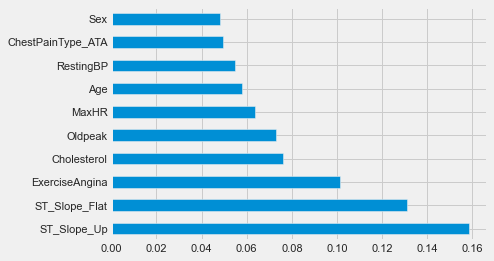

In [337]:
feat_importances = pd.Series(model.feature_importances_, index = X_EDA.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

In [342]:
imp = pd.DataFrame(feat_importances)
imp = imp.reset_index(level=0)
imp.rename(columns = {'index': 'Feature Name', 0: 'Feature Score'}, inplace = True)


In [345]:
imp.to_csv('importance.csv', index=False)

In [ ]:
# Handle Imbalanced data
#      Under sampling
#      Over Sampling

In [346]:
#For Logistics Regression we dont need to scale data manually
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear',random_state =0)
#If you dont include solver='liblinear', you'll get an error for some reason (This doesnt happen when i do it offline)
LR.fit(train_x,train_y)
y_pred = LR.predict(test_x)

Feature: 0, Score: 0.06790
Feature: 1, Score: 0.01577
Feature: 2, Score: 0.07298
Feature: 3, Score: 0.11886
Feature: 4, Score: 0.02826
Feature: 5, Score: 0.09675
Feature: 6, Score: 0.03278
Feature: 7, Score: 0.05664
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.02049
Feature: 10, Score: 0.03178
Feature: 11, Score: 0.00654
Feature: 12, Score: 0.01146
Feature: 13, Score: 0.00708
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.42273
Feature: 16, Score: 0.00724
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00275


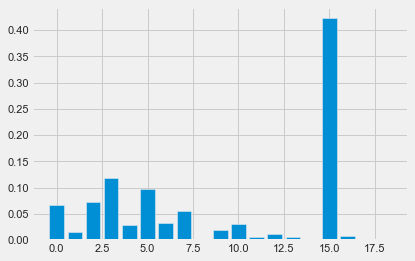

In [348]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
# fit the model
DT.fit(train_x, train_y)
# get importance
importance = DT.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

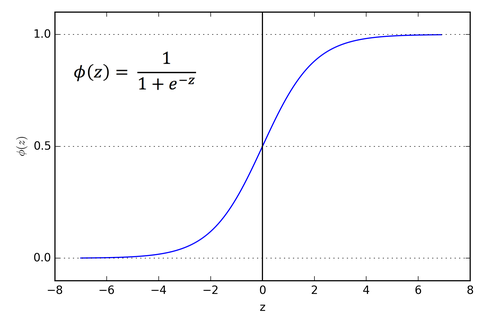

In [135]:
from IPython.display import Image
Image(filename='l.png')
# Sigmoid Function

The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:-

p ≥ 0.5 => class = 1

p < 0.5 => class = 0

# Assumptions of Logistic Regression 

The Logistic Regression model requires several key assumptions. These are as follows:-

Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.

It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.

Logistic Regression algorithm requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.

Logistic Regression model assumes linearity of independent variables and log odds.

The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.

In [349]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import recall_score,roc_curve,roc_auc_score,plot_confusion_matrix

One-hot encoding for category data. Numerical data uses standardized processing


In [350]:
acc = round(LR.score(test_x,test_y),2)
acc

0.83

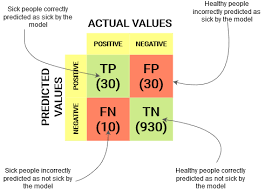

In [148]:
from IPython.display import Image
Image(filename='confus.png')

True Positive (TP) 

The predicted value matches the actual value
The actual value was positive and the model predicted a positive value
True Negative (TN) 

The predicted value matches the actual value
The actual value was negative and the model predicted a negative value
False Positive (FP) – Type 1 error

The predicted value was falsely predicted
The actual value was negative but the model predicted a positive value
Also known as the Type 1 error
False Negative (FN) – Type 2 error

The predicted value was falsely predicted
The actual value was positive but the model predicted a negative value
Also known as the Type 2 error

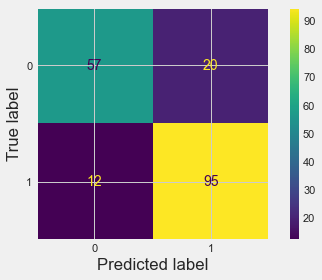

In [239]:
plot_confusion_matrix(LR,test_x,test_y)

# Day 3

# Model Building

# Logistic Regression

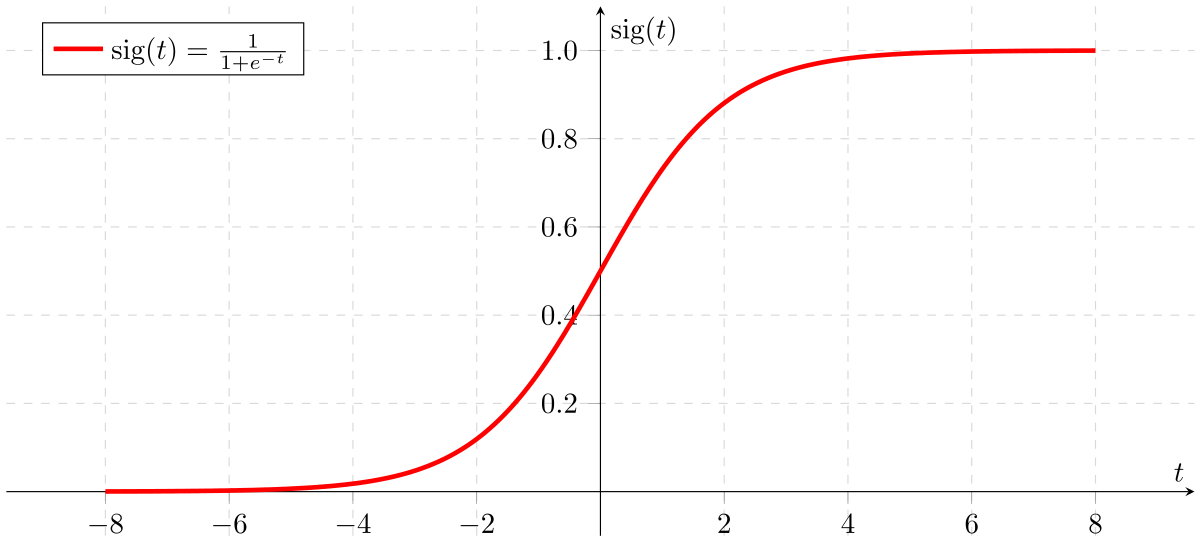

In [478]:
from IPython.display import Image
Image(filename='lr.png')

The logistic regression is one of the most popular and straightforward models for classification.

This model can be used for binary, multinominal or ordinal classification.

It can be set a threshold to predict which class an observation relates.

The main disadvantage of this model is that the interpretation may result complex.

In [351]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear',random_state =0)
#If you dont include solver='liblinear', you'll get an error for some reason (This doesnt happen when i do it offline)
LR.fit(train_x,train_y)
y_pred = LR.predict(test_x)

In [520]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [361]:
def fit(clf, params, cv=10, train_x=train_x, train_y=train_y):
    grid = GridSearchCV(clf, params, cv=KFold(n_splits=cv), n_jobs=1, verbose=1, return_train_score=True, scoring='accuracy', refit=True) #verbose and n_jobs help us see the computation time and score of a cv. Higher the value of verbose, more the information printed out.
    grid.fit(train_x, train_y)
    return grid



In [ ]:
def make_predictions(model, test_x=test_x):
    return model.predict(test_x)



In [ ]:
def best_scores(model):
    # print(f'The mean cross validation test score is: {model.cv_results_.mean_test_score}') #for some reason this wasn't working for me even though the attribute exists so lets just leave it.
    print(f'The best parameters are: {model.best_params_}')
    print(f'The best score that we got is: {model.best_score_}')
    return None



In [ ]:
def plot_confusion_matrix(y_pred):
    print('00: True Negatives\n01: False Positives\n10: False Negatives\n11: True Positives\n')
    conf_matrix = confusion_matrix(y_true=test_y, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap='GnBu', alpha=0.75)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large') 
    plt.xlabel('Predictions', fontsize=14)
    plt.ylabel('Actuals', fontsize=14)
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()
    return None



In [ ]:
def check_scores(y_pred):
    print('Precision: %.3f' % precision_score(test_y, y_pred))
    print('Recall: %.3f' % recall_score(test_y, y_pred))
    print('Accuracy: %.3f' % accuracy_score(test_y, y_pred))
    print('F1 Score: %.3f' % f1_score(test_y, y_pred))
    print('ROC-AUC Score: %.3f' % roc_auc_score(test_y, y_pred))
    return None

In [366]:
lr_params = {'C':[0.001,.009,0.01,.09,1,5,10,25], 'penalty':['l1', 'l2']} #lasso and ridge regression
lr_clf = LogisticRegression(solver='saga', max_iter=5000)
lr_model = fit(lr_clf, lr_params)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [367]:
best_scores(lr_model)

The best parameters are: {'C': 5, 'penalty': 'l2'}
The best score that we got is: 0.8787115883006293


In [368]:
lr_y_pred = make_predictions(lr_model)
check_scores(lr_y_pred)

Precision: 0.829
Recall: 0.907
Accuracy: 0.837
F1 Score: 0.866
ROC-AUC Score: 0.823


00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



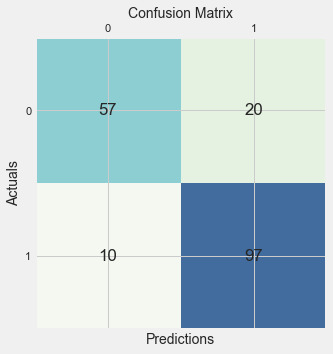

In [369]:
plot_confusion_matrix(lr_y_pred)

# Gaussian NB

What is the difference between naive Bayes and Gaussian naive Bayes?

Naive Bayes has higher accuracy and speed when we have large data points. 

There are three types of Naive Bayes models: 
    
Gaussian, Multinomial, and Bernoulli. Gaussian Naive Bayes – This is a variant of Naive Bayes which supports continuous values and has an assumption that each class is normally distributed.

Bayes’ Theorem is stated as:

P(h|d) = (P(d|h) * P(h)) / P(d)

Where

P(h|d) is the probability of hypothesis h given the data d. This is called the posterior probability.

P(d|h) is the probability of data d given that the hypothesis h was true.

P(h) is the probability of hypothesis h being true (regardless of the data). This is called the prior probability of h.

P(d) is the probability of the data (regardless of the hypothesis).

You can see that we are interested in calculating the posterior probability of P(h|d) from the prior probability p(h) with P(D) and P(d|h).

Problem: 
    
    Given the historical data, we want to predict if the flight will land in time if the weather is Dusty?

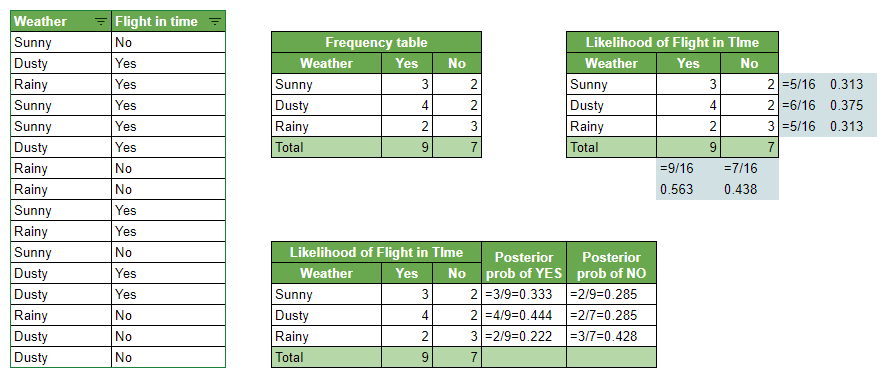

In [498]:
from IPython.display import Image
Image(filename='GNB.png')

In [376]:
gnb_params = {'priors': [None], 'var_smoothing': np.logspace(0,-9, num=100)}
gnb_clf = GaussianNB()
gnb_model = fit(gnb_clf, gnb_params)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [377]:
best_scores(gnb_model)

The best parameters are: {'priors': None, 'var_smoothing': 0.01}
The best score that we got is: 0.8746019992595334


In [378]:
gnb_y_pred = make_predictions(gnb_model)
check_scores(gnb_y_pred)

Precision: 0.855
Recall: 0.879
Accuracy: 0.842
F1 Score: 0.866
ROC-AUC Score: 0.835


00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



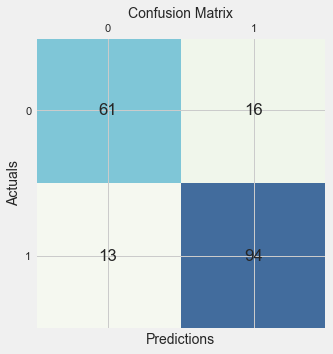

In [379]:
plot_confusion_matrix(gnb_y_pred)

# KNN

The KNN algorithm assumes that similar data points that are near each other will belong to the same class.

K refers to the number of neigbors from each observation.

The idea of similarity is known as distance or proximity. The goal is to find the optimal distance for the observations.

It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

The following image nicely represents the idea of how the algorithm works.

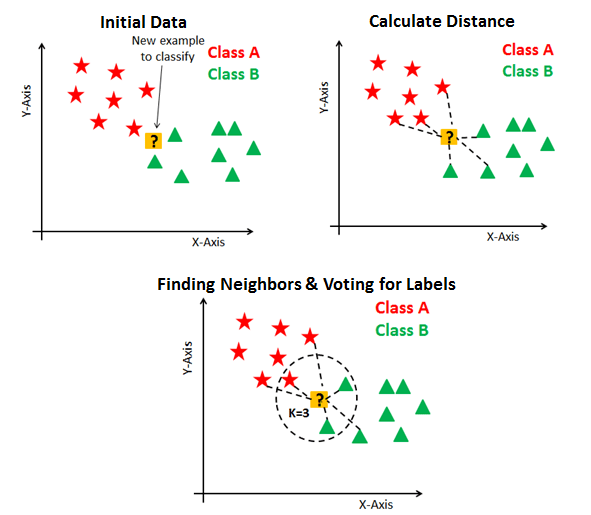

In [480]:
from IPython.display import Image
Image(filename='knn.png')

How to decide the number of neighbours in kNN? 


While building the kNN classifier model, one question that come to my mind is what should be the value of nearest neighbours (k) that yields highest accuracy. This is a very important question because the classification accuracy depends upon our choice of k.


The number of neighbours (k) in kNN is a parameter that we need to select at the time of model building. Selecting the optimal value of k in kNN is the most critical problem. A small value of k means that noise will have higher influence on the result. So, probability of overfitting is very high. A large value of k makes it computationally expensive in terms of time to build the kNN model. Also, a large value of k will have a smoother decision boundary which means lower variance but higher bias.

In [380]:
knns_params = {'n_neighbors': list(range(1, 31)), 'weights': ['uniform', 'distance'], 
               'metric': ['euclidean', 'manhattan']}
knns_clf = KNeighborsClassifier()
knns_model = fit(knns_clf, knns_params)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


In [381]:
best_scores(knns_model)

The best parameters are: {'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}
The best score that we got is: 0.8760273972602739


In [382]:
knns_y_pred = make_predictions(knns_model)
check_scores(knns_y_pred)

Precision: 0.830
Recall: 0.869
Accuracy: 0.821
F1 Score: 0.849
ROC-AUC Score: 0.811


00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



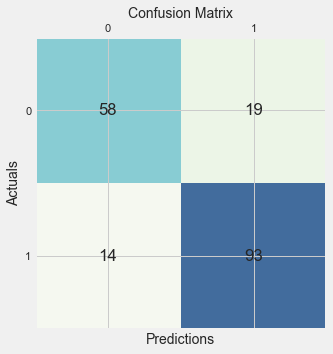

In [383]:
plot_confusion_matrix(knns_y_pred)

# SVC (Support vector Classifier)

The objective of the Support Vector Machine (SVM) algorithm is to find an optimal hyperplane in N-dimensional space (N refers to the number of features) that distinctly classifies the data points.

The points closest to the hyperplane are called support vector points, and the distance of the vectors from the hyperplane are called margins.

The SVM algorithm aims to maximize the margin between the support vector points and the hyperplane.

There are different types of kernels: linear, polynomial and Gaussian.
    
Radial basis function kernel (RBF)/ Gaussian Kernel is a function whose value depends on the distance from the origin or some point. This kernel has two parameters: C (Inverse to the strength of regularization) and Gamma (to decrease underfits)

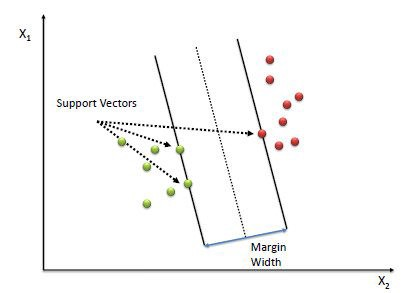

In [482]:
from IPython.display import Image
Image(filename='svc.jpg')

Hyperplane

A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the maximum margin hyperplane and the linear classifier it defines is known as the maximum margin classifier.

Support Vectors

Support vectors are the sample data points, which are closest to the hyperplane. These data points will define the separating line or hyperplane better by calculating margins.

Margin

A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.

In [384]:
svm_params = {'C':[1,10,100,1000], 'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
svm_clf = SVC()
svm_model = fit(svm_clf, svm_params)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


In [385]:
best_scores(svm_model)

The best parameters are: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
The best score that we got is: 0.8773787486116253


In [386]:
svm_y_pred = make_predictions(svm_model)
check_scores(svm_y_pred)

Precision: 0.842
Recall: 0.897
Accuracy: 0.842
F1 Score: 0.869
ROC-AUC Score: 0.832


00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



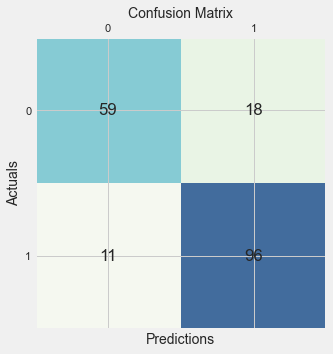

In [387]:
plot_confusion_matrix(svm_y_pred)

# Decision Tree Classfier

The main benefit of this algorithm is its straightforward interpretation and visualization.

Impurity refers to the quality of a split in a determined decision. There are several ways to measure the impurity of the decision tree.

Decision Trees don't require any normalization or standardization.

This algorithm doesn't perform well (in general), but it helps introduce algorithms like the Random Forest.

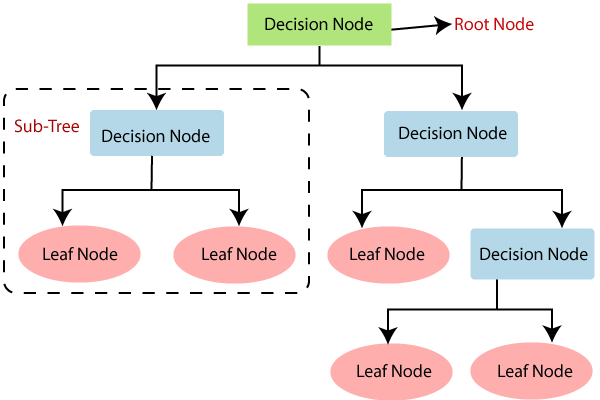

In [484]:
from IPython.display import Image
Image(filename='dttt.png')

In [388]:
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10), 
             'min_samples_leaf': range(1,5)}
dt_clf = DecisionTreeClassifier()
dt_model = fit(dt_clf, dt_params)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


In [389]:
best_scores(dt_model)

The best parameters are: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4}
The best score that we got is: 0.8583302480562756


In [390]:
dt_y_pred = make_predictions(dt_model)
check_scores(dt_y_pred)

Precision: 0.857
Recall: 0.841
Accuracy: 0.826
F1 Score: 0.849
ROC-AUC Score: 0.823


00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



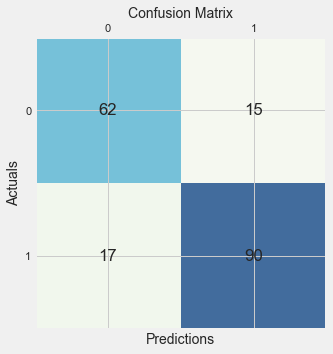

In [391]:
plot_confusion_matrix(dt_y_pred)

# Random Forest

Bagging is an ensemble algorithm that fits multiple models on different subsets of a training dataset, then combines the predictions from all models. Random forest is an extension of bagging that also randomly selects subsets of features used in each data sample.

Random forest consist on a large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

The trees protect each other from their individual errors.

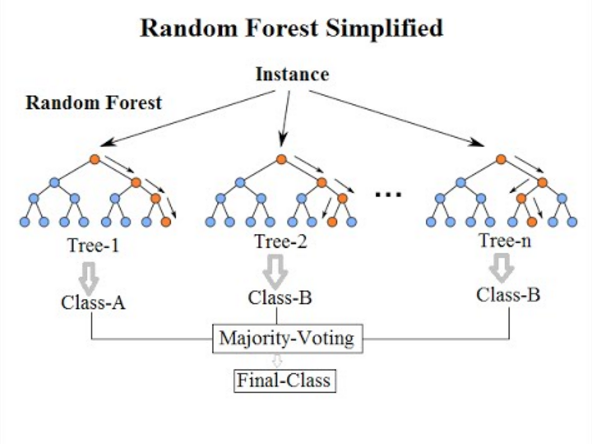

In [485]:
from IPython.display import Image
Image(filename='rff.png')

In [399]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(train_x, train_y)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [401]:
y_pred = classifier.predict(test_x)

In [402]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [405]:
## Make the Classificatoin Report and Confusion Matrix
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, accuracy_score, recall_score, auc
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        77
           1       0.85      0.87      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [408]:
cm = confusion_matrix(test_y, y_pred)
print(cm)
print('Random Forest Classifier has an accuracy score of {:.2f} and recall score of class  {:.2f}'.format((accuracy_score(test_y, y_pred) *100),(recall_score(test_y, y_pred) *100)))

[[61 16]
 [14 93]]
Random Forest Classifier has an accuracy score of 83.70 and recall score of class  86.92


In [486]:
n_estimators = [100, 150, 200]
max_depth = [15, 20, 25]
max_depth.append(None)
max_features = ['auto', 'sqrt']
min_samples_split = [5, 10, 15]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

params = {'n_estimators': n_estimators, 'max_features': max_features,
          'max_depth': max_depth, 'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

RF = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = RF, 
                           param_grid = params,
                           scoring = 'f1',
                           cv = 5,
                           verbose=0, 
                           n_jobs=-1)

grid_search.fit(train_x, train_y)
print("best score: ", grid_search.best_score_)
print("best param: ", grid_search.best_params_)

best score:  0.8976138217608345
best param:  {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}


In [487]:
best_params = grid_search.best_params_
RF = RandomForestClassifier(random_state=42, **best_params)
                            
RF = RF.fit(train_x, train_y)
y_pred = RF.predict(test_x)

print('Accuracy score: ', round(accuracy_score(test_y, y_pred), 4))
print('F1 Score: ', round(f1_score(test_y, y_pred), 4))

Accuracy score:  0.8641
F1 Score:  0.8858


# Naive Bayes

In [409]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_x, train_y)

GaussianNB()

In [410]:
y_pred = classifier.predict(test_x)

In [412]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        77
           1       0.86      0.89      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



In [413]:
cm = confusion_matrix(test_y, y_pred)
print(cm)
print('Naive Bayes Classifier has an accuracy score of {:.2f} and recall score of {:.2f}'.format((accuracy_score(test_y, y_pred) *100),(recall_score(test_y, y_pred) *100)))

[[61 16]
 [12 95]]
Naive Bayes Classifier has an accuracy score of 84.78 and recall score of 88.79


# SVM

In [414]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(train_x, train_y)

SVC(random_state=0)

In [415]:
y_pred = classifier.predict(test_x)

In [417]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        77
           1       0.85      0.91      0.88       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184



In [418]:
cm = confusion_matrix(test_y, y_pred)
print(cm)
print('Kernel SVM Classifier has an accuracy score of {:.2f} and recall score of {:.2f}'.format((accuracy_score(test_y, y_pred) *100),(recall_score(test_y, y_pred) *100)))

[[60 17]
 [10 97]]
Kernel SVM Classifier has an accuracy score of 85.33 and recall score of 90.65


# XGBOOST

In [492]:
import xgboost as xgb
classifier = xgb.XGBClassifier(use_label_encoder=False)
classifier.fit(train_x, train_y, eval_metric="aucpr")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [493]:
y_pred_xgboost = classifier.predict(test_x)

In [494]:
print(classification_report(test_y,y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        77
           1       0.87      0.91      0.89       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [495]:
cm = confusion_matrix(test_y, y_pred_xgboost)
print(cm)
print('XGBoost Classifier has an accuracy score of {:.2f} and recall score of {:.2f}'.format((accuracy_score(test_y, y_pred) *100),(recall_score(test_y, y_pred) *100)))

[[62 15]
 [10 97]]
XGBoost Classifier has an accuracy score of 84.78 and recall score of 89.72


<AxesSubplot:>

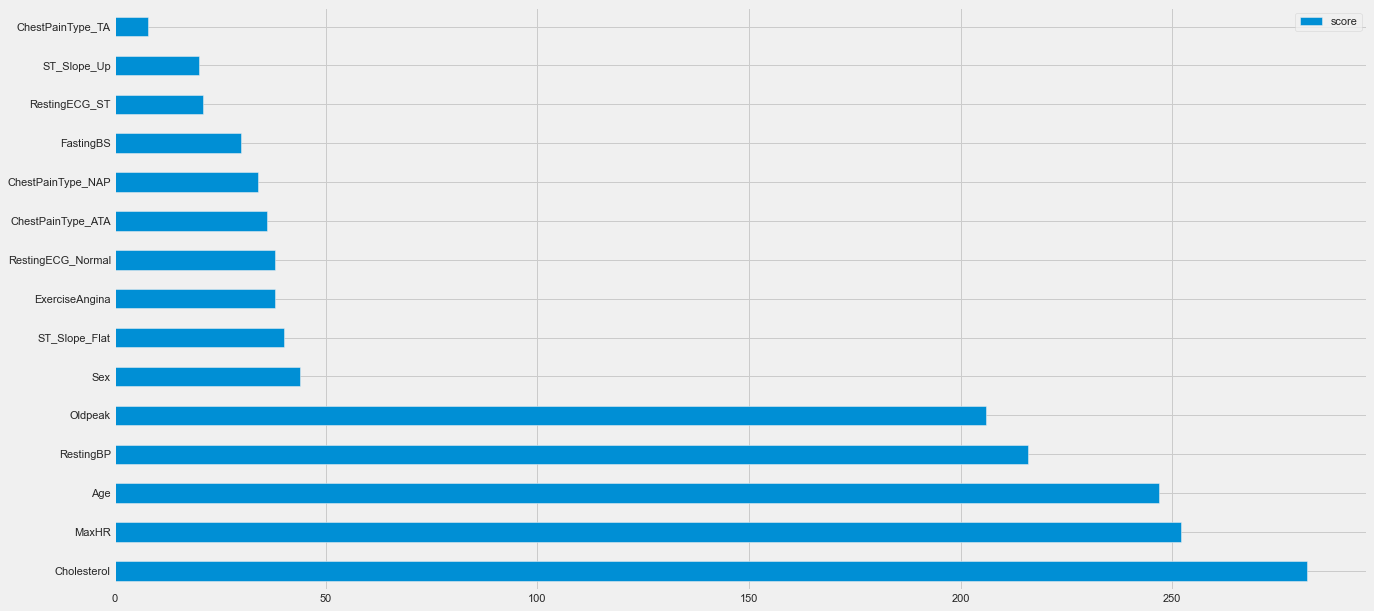

In [512]:
feature_important = classifier.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [516]:
data
data = data.reset_index(level=0)
data.rename(columns = {'index': 'Feature Name', 0: 'Feature Score'}, inplace = True)

In [518]:
data.to_csv('importance_xgboost.csv', index=False)

# Ada Boost

In [491]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, random_state = 42))

param_grid = {'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1],
              'n_estimators':[140, 150, 160]}

GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid, 
                      scoring='f1',
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(train_x, train_y)
y_pred_adaboost = GV_ABC.predict(test_x)

print("best param: ", GV_ABC.best_params_)
print('Accuracy score: ', round(accuracy_score(test_y, y_pred_adaboost), 4))
print('F1 Score: ', round(f1_score(test_y, y_pred_adaboost), 4))

best param:  {'learning_rate': 0.025, 'n_estimators': 150}
Accuracy score:  0.8478
F1 Score:  0.8727


# Comparision between Adaboost and XGboost

<AxesSubplot:xlabel='accuracy', ylabel='algorithms'>

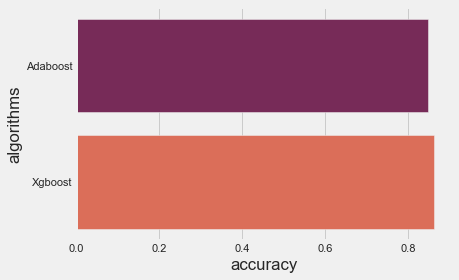

In [497]:
acc = pd.DataFrame({
    "algorithms": ['Adaboost', 'Xgboost'],
    "accuracy": [accuracy_score(test_y, y_pred_adaboost),accuracy_score(test_y, y_pred_xgboost)]
})
sns.barplot(x='accuracy', y='algorithms', data=acc, palette='rocket')

# Hyperparameter Tuning

# What is the importance of hyperparameter tuning?

Hyperparameters are crucial as they control the overall behaviour of a machine learning model.

In [424]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [425]:
# A parameter grid for XGBoost
params = {'min_child_weight': [1, 5, 10],'gamma': [0.5, 1, 1.5, 2, 5],'subsample': [0.6, 0.8, 1.0],
          'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5] }

In [427]:
# Apply iterative randomized search to find the best parameter values combination
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)

classifier_tuned = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, 
                                   scoring='recall', n_jobs=4, cv=skf.split(train_x,train_y), 
                                   verbose=3, random_state=1001,return_train_score=False)
classifier_tuned.fit(train_x, train_y,eval_metric="aucpr")
print(classifier_tuned.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 3, 'gamma': 5, 'colsample_bytree': 1.0}


In [429]:
# Generate the new model with the tuned parameters
classifier = xgb.XGBClassifier(**classifier_tuned.best_params_,use_label_encoder=False)
classifier.fit(train_x, train_y, eval_metric="aucpr")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              enable_categorical=False, gamma=5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [430]:
y_pred = classifier.predict(test_x)

In [431]:
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        72
           1       0.89      0.85      0.87       112

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



In [432]:
cm = confusion_matrix(test_y, y_pred)
print(cm)
print('Tuned XGBoost Classifier has an accuracy score of {:.2f} and recall score of {:.2f}'.format((accuracy_score(test_y, y_pred) *100),(recall_score(test_y, y_pred) *100)))

[[60 17]
 [12 95]]
Tuned XGBoost Classifier has an accuracy score of 84.24 and recall score of 88.79


Hyperparmeter tuning slightly enhamce the accuracy score. Let's plot the ROC curve fot it:

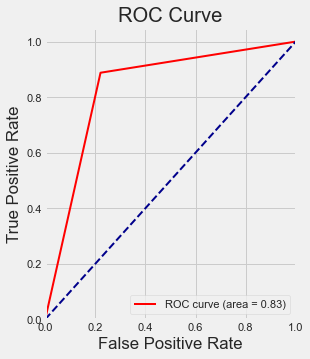

In [433]:
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(4,5))
lw = 2
plt.plot(fpr, tpr, color='red', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

ROC curves are frequently used to show in a graphical way the connection/trade-off between clinical sensitivity and specificity for every possible cut-off for a test or a combination of tests. 

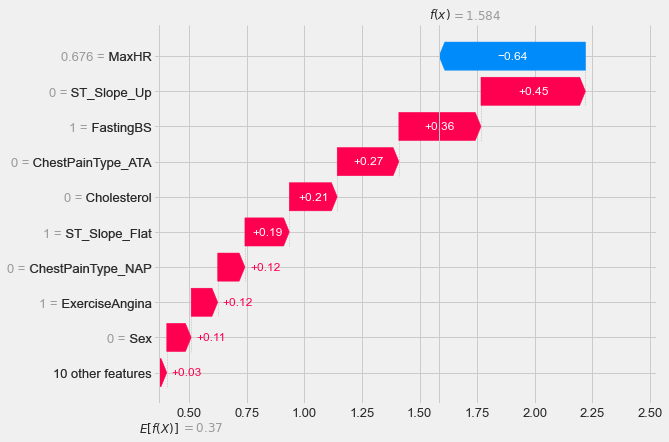

In [437]:
import shap
explainer = shap.Explainer(classifier, train_x)
shap_values = explainer(train_x, check_additivity=False )
shap.plots.waterfall(shap_values[0])

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction to class 1 (Heart Disease) are shown in red, those pushing the prediction to class 0 (No Heart Disease) are in blue.

In [438]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [440]:
random_state = 17
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000],
                  "probability":[False]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"],
                     "solver" : ["liblinear"]
                    }

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [441]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm
#Python library that allows you to output a smart progress bar by wrapping around any iterable. 
#A tqdm progress bar not only shows you how much time has elapsed, but also shows the estimated time remaining for the 
#iterable.
cv_result = []
best_params = []
best_estimators = []
for i in tqdm(range(len(classifier))):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(train_x,train_y)
    cv_result.append(clf.best_score_)
    best_params.append(clf.best_params_)
    best_estimators.append(clf.best_estimator_)
    print((classifier[i]), cv_result[i])

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


 20%|████████████████▊                                                                   | 1/5 [00:05<00:20,  5.12s/it]

DecisionTreeClassifier(random_state=17) 0.8569418733802296
Fitting 10 folds for each of 28 candidates, totalling 280 fits


 40%|█████████████████████████████████▌                                                  | 2/5 [00:06<00:08,  2.88s/it]

SVC(random_state=17) 0.8773787486116253
Fitting 10 folds for each of 54 candidates, totalling 540 fits


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:45<00:38, 19.46s/it]

RandomForestClassifier(random_state=17) 0.8814698259903739
Fitting 10 folds for each of 14 candidates, totalling 140 fits


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:46<00:11, 11.94s/it]

LogisticRegression(random_state=17) 0.8787300999629768
Fitting 10 folds for each of 40 candidates, totalling 400 fits


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:47<00:00,  9.40s/it]

KNeighborsClassifier() 0.8760644205849685


In [442]:
cv_result = pd.DataFrame(
    {'cv_result' : cv_result,
        'best_params' : best_params,
        'best_estimators': best_estimators})

In [443]:
cv_result

,cv_result,best_params,best_estimators
0,0.856942,"{'max_depth': 5, 'min_samples_split': 10}","DecisionTreeClassifier(max_depth=5, min_sample..."
1,0.877379,"{'C': 200, 'gamma': 0.001, 'kernel': 'rbf', 'p...","SVC(C=200, gamma=0.001, random_state=17)"
2,0.881470,"{'bootstrap': False, 'criterion': 'gini', 'max...","(DecisionTreeClassifier(max_features=1, min_sa..."
3,0.878730,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...","LogisticRegression(random_state=17, solver='li..."
4,0.876064,"{'metric': 'euclidean', 'n_neighbors': 15, 'we...","KNeighborsClassifier(metric='euclidean', n_nei..."


In [444]:
classifier

[DecisionTreeClassifier(random_state=17),
 SVC(random_state=17),
 RandomForestClassifier(random_state=17),
 LogisticRegression(random_state=17),
 KNeighborsClassifier()]

In [445]:
dt_model = best_estimators[0]
svc_model = best_estimators[1]
rf_model = best_estimators[2]
Logit_model = best_estimators[3]
knn_model = best_estimators[4]

In [448]:
dt_model.fit(train_x, train_y)
svc_model.fit(train_x, train_y)
rf_model.fit(train_x, train_y)
Logit_model.fit(train_x, train_y)
knn_model.fit(train_x, train_y)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [449]:
predicts = [
    dt_model.predict(test_x),
    svc_model.predict(test_x),
    rf_model.predict(test_x),
    Logit_model.predict(test_x),
    knn_model.predict(test_x),
]

In [450]:
train_scores = [
    dt_model.score(train_x, train_y),
    svc_model.score(train_x, train_y),
    rf_model.score(train_x, train_y),
    Logit_model.score(train_x, train_y),
    knn_model.score(train_x, train_y),
]

In [451]:
test_scores = [
    dt_model.score(test_x, test_y),
    svc_model.score(test_x, test_y),
    rf_model.score(test_x, test_y),
    Logit_model.score(test_x, test_y),
    knn_model.score(test_x, test_y),
]

In [452]:
from sklearn.metrics import roc_auc_score

auc_scores = [roc_auc_score(test_y, pred) for pred in predicts]

model_result = pd.DataFrame(
    {
        'best_estimators' : best_estimators,
        'train_scores' : train_scores,
        'test_scores' : test_scores,
        'auc_scores' : auc_scores
    }
)

In [453]:
model_result

,best_estimators,train_scores,test_scores,auc_scores
0,"DecisionTreeClassifier(max_depth=5, min_sample...",0.903270,0.831522,0.827831
1,"SVC(C=200, gamma=0.001, random_state=17)",0.884196,0.847826,0.836388
2,"(DecisionTreeClassifier(max_features=1, min_sa...",0.938692,0.853261,0.842881
3,"LogisticRegression(random_state=17, solver='li...",0.884196,0.826087,0.814055
4,"KNeighborsClassifier(metric='euclidean', n_nei...",0.880109,0.831522,0.820549


# SVC

In [465]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(train_x, train_y)

SVC(random_state=42)

In [466]:
y_pred = classifier.predict(test_x)

<AxesSubplot:>

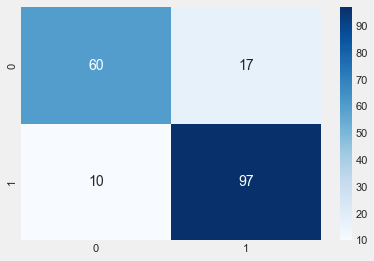

In [468]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(test_y, y_pred)
sns.heatmap(cf, annot=True,cmap="Blues")

In [469]:
from sklearn import metrics
from sklearn.metrics import classification_report
print("\n Classification_report: \n",classification_report(test_y,y_pred))


 Classification_report: 
               precision    recall  f1-score   support

           0       0.86      0.78      0.82        77
           1       0.85      0.91      0.88       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184



In [477]:
pred = classifier.predict(test_x)

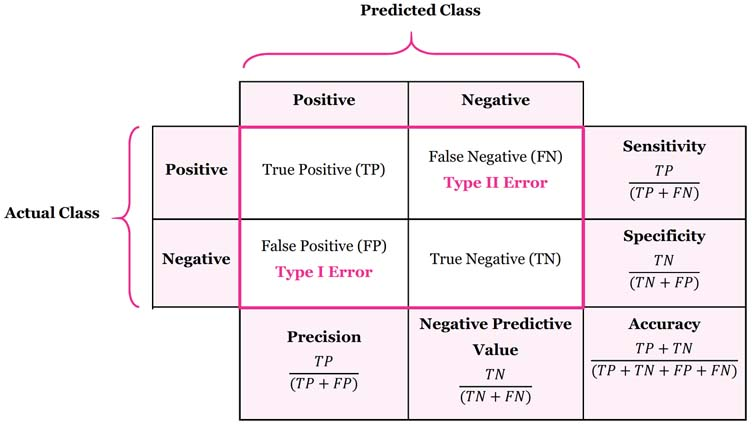

In [500]:
from IPython.display import Image
Image(filename='cm.jpg')

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

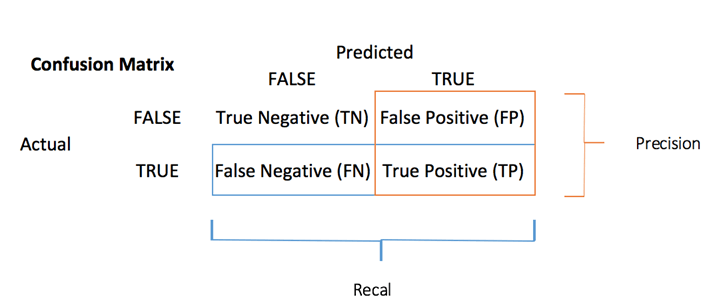

In [502]:
from IPython.display import Image
Image(filename='cm1.png')

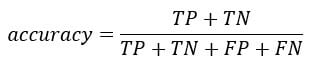

In [504]:
from IPython.display import Image
Image(filename='acc.jpg')

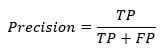

In [506]:
from IPython.display import Image
Image(filename='pre.jpg')

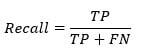

In [505]:
from IPython.display import Image
Image(filename='rec.jpg')

# Understanding of Confusion Matrix

A simple story of Boy and a wolf, 

 
For having fun, a boy shouted out “Wolf”, even though there is no wolf, villagers ran out to save themselves but soon got angry when they realized the boy was playing a joke. 

 
One day, the boy saw a wolf in reality and called out “Wolf is coming”, but villagers denied to be fooled again and stayed at home. And then, the hungry wolf demolished the village, destroyed their crops. After that, the entire village suffered many problems.


Making definitions: 

 

“Wolf” is a positive class

“No wolf” is a negative class



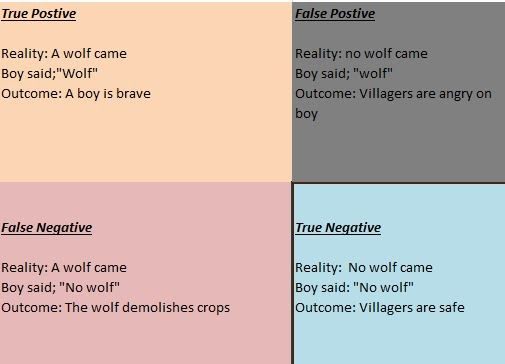

In [507]:
from IPython.display import Image
Image(filename='cm2.jpg')

Precision:

Precision explains how many correctly predicted values came out to be positive actually. Or simply it gives the number of correct outputs given by the model out of all the correctly predicted positive values by the model.

Recall:

Recall describes how many of the actual positive values to be predicted correctly out of the model. It is useful when false-negative dominates false positives. 

F-Measure:
 
For the condition when two models have low precision and high recall or vice versa, it becomes hard to compare those models, therefore to solve this issue we can deploy F-score. 

“F-score is a harmonic mean of Precision and Recall”.

F-measure= (2*Recall*precision)/ (Recall + Precision)

Receiver Operating Characteristic (ROC) Curve: 
    
    It is a graph that reflects the performance of the classifier for all desirable thresholds. Also, a graph is plotted amid the true positive rate (on the Y-axis) and the false Positive rate (on the x-axis).

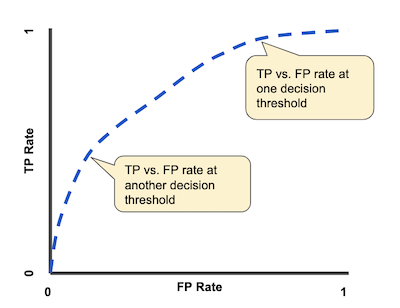

In [510]:
from IPython.display import Image
Image(filename='rocz.png')